## Data Loading

In [1]:
# Import necessary dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


# Filter warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Set the datapath

DATA_PATH = "./data/IRIS.csv"

In [3]:
# Load the dataset

iris = pd.read_csv(DATA_PATH)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# No. of rows and columns

iris.shape

(150, 5)

In [5]:
# Basic information about the columns

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# Statistical decription

iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Value counts of our target variable

iris.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [8]:
# Remove 'Iris-' from the species column

iris['species'] = iris['species'].str.replace('Iris-', '')
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
64,5.6,2.9,3.6,1.3,versicolor
71,6.1,2.8,4.0,1.3,versicolor
84,5.4,3.0,4.5,1.5,versicolor
11,4.8,3.4,1.6,0.2,setosa
100,6.3,3.3,6.0,2.5,virginica
91,6.1,3.0,4.6,1.4,versicolor
72,6.3,2.5,4.9,1.5,versicolor
123,6.3,2.7,4.9,1.8,virginica
5,5.4,3.9,1.7,0.4,setosa
137,6.4,3.1,5.5,1.8,virginica


## Exploratory Data Analysis (EDA)

In [9]:
# Configuring styles
sns.set_palette("Set1")
sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.figsize"] = (9, 5)
matplotlib.rcParams["figure.facecolor"] = '#00000000'

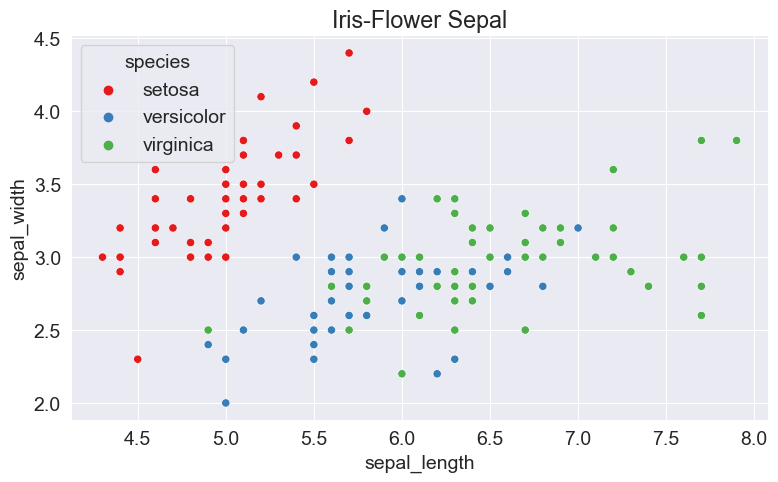

In [10]:
# Chart title
plt.title("Iris-Flower Sepal")

# Create a scatter plot
sns.scatterplot(x="sepal_length", y="sepal_width", hue="species", data=iris);

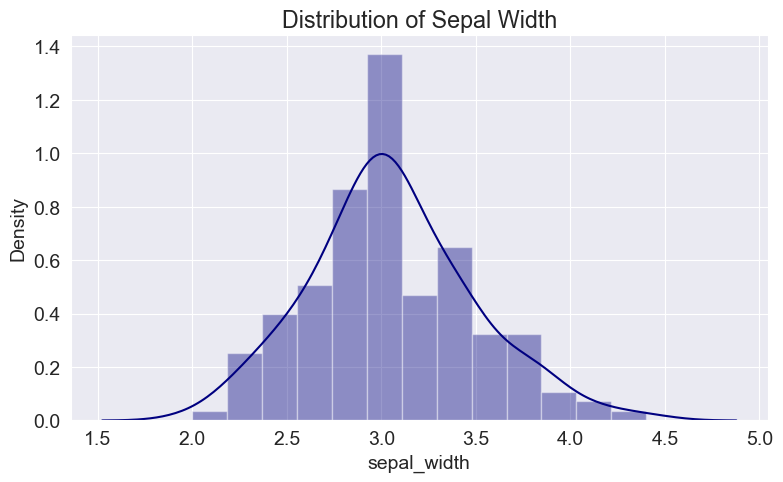

In [11]:
plt.title("Distribution of Sepal Width")

sns.distplot(iris.sepal_width, kde=True, color="navy");

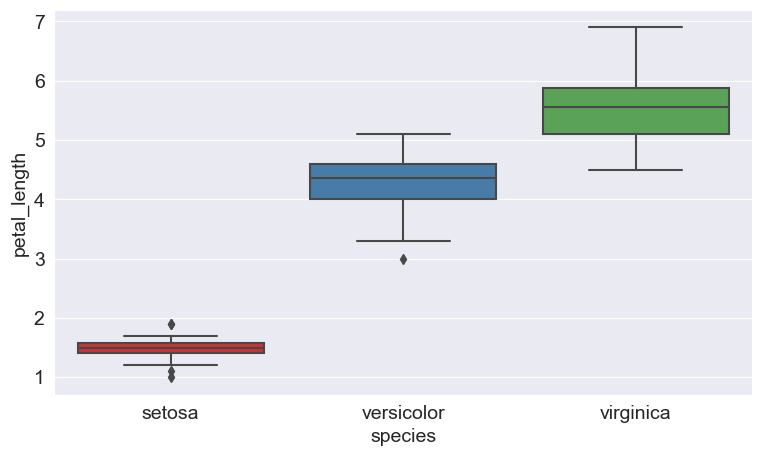

In [12]:
sns.boxplot(x="species", y="petal_length", data=iris);

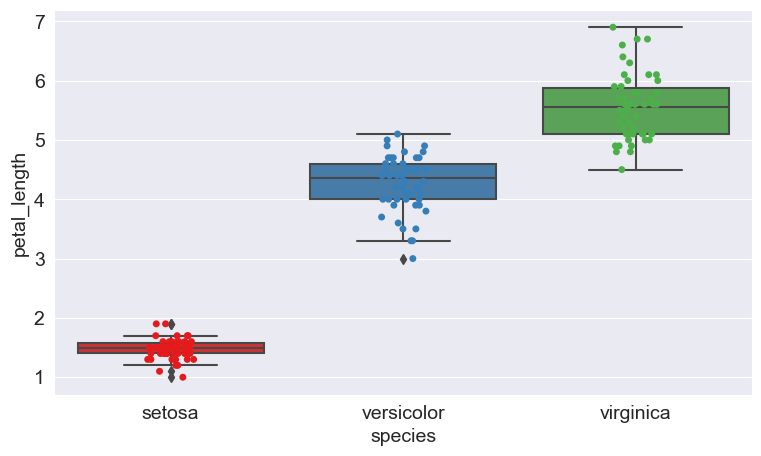

In [13]:
ax = sns.boxplot(x="species", y="petal_length", data=iris)
ax = sns.stripplot(x="species", y="petal_length", data=iris, jitter=True, edgecolor="gray", palette="Set1")

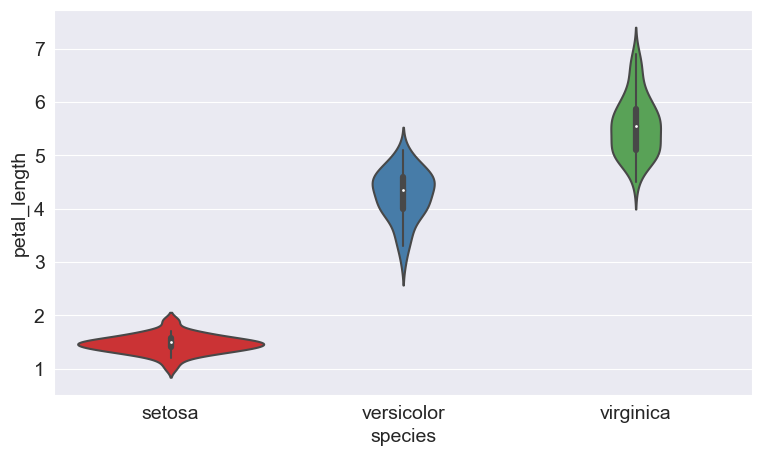

In [14]:
sns.violinplot(x="species", y="petal_length", data=iris);

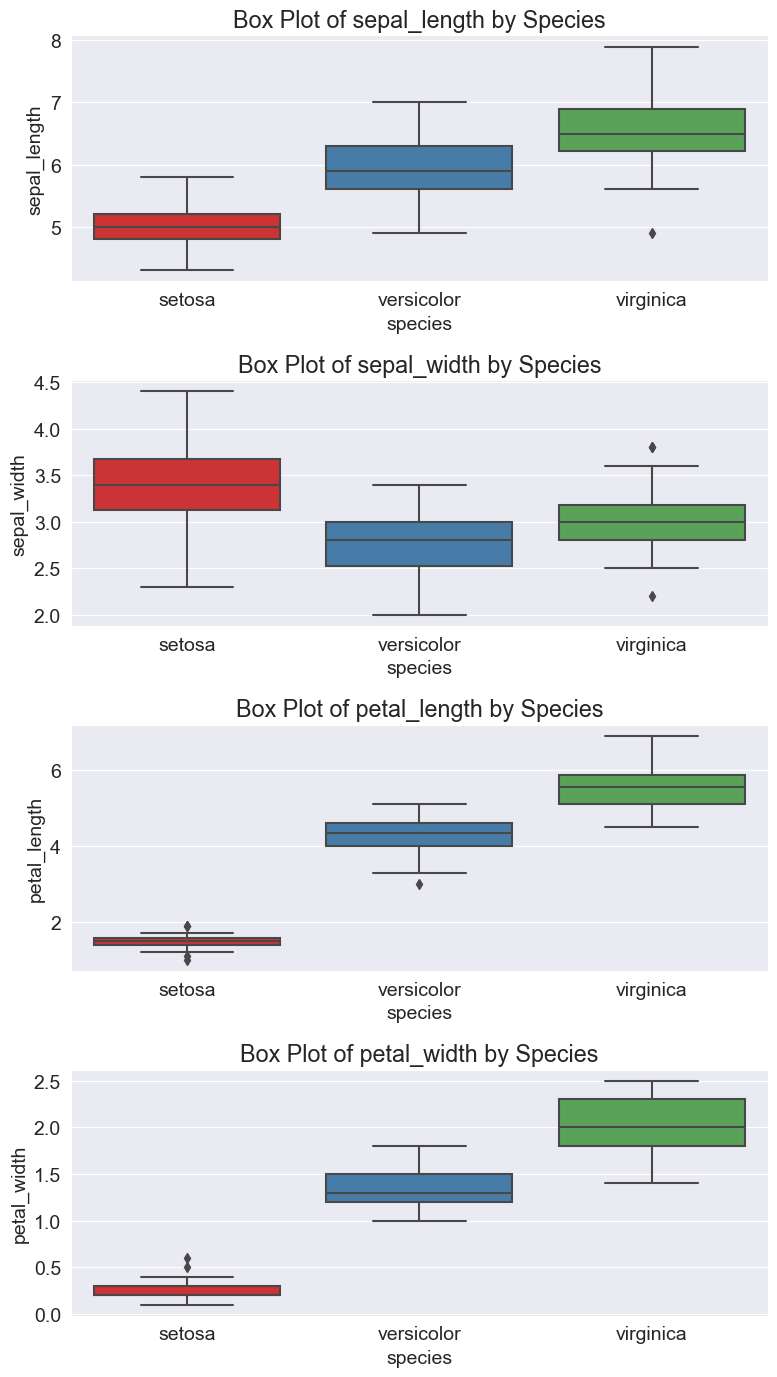

In [15]:
# Create box plots for each feature split by species
plt.figure(figsize=(8, 14))
for i, feature in enumerate(iris.columns[:-1]):  # Exclude the 'species' column
    plt.subplot(4, 1, i + 1)  # Create subplots in a 2x2 grid
    sns.boxplot(data=iris, x="species", y=feature)
    plt.title(f"Box Plot of {feature} by Species")

# Adjust the layout
plt.tight_layout()

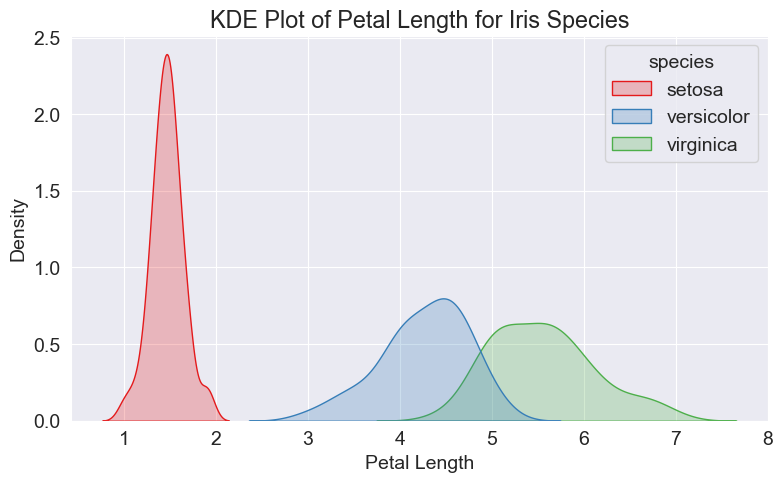

In [16]:
# Add labels and title
plt.xlabel("Petal Length")
plt.ylabel("Density")
plt.title("KDE Plot of Petal Length for Iris Species")

# Create a KDE plot for each species
sns.kdeplot(data=iris, x="petal_length", hue="species", common_norm=False, fill=True);

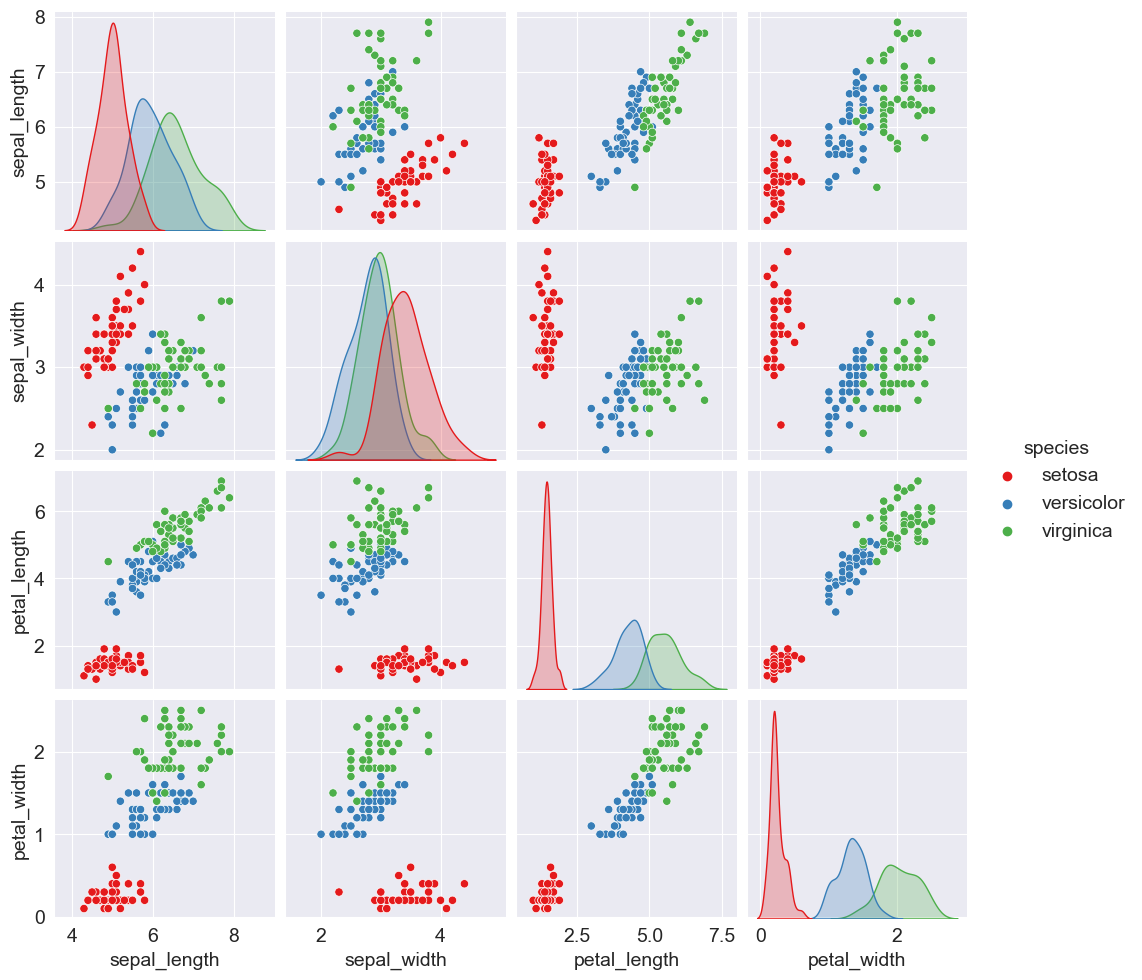

In [17]:
sns.pairplot(iris, hue="species", diag_kind="kde");

## Data Transformation

In [18]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [19]:
iris["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [20]:
iris["species"].replace({"setosa": 0, "versicolor": 1, "virginica": 2}, inplace=True)
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
81,5.5,2.4,3.7,1.0,1
28,5.2,3.4,1.4,0.2,0
40,5.0,3.5,1.3,0.3,0
2,4.7,3.2,1.3,0.2,0
48,5.3,3.7,1.5,0.2,0
133,6.3,2.8,5.1,1.5,2
41,4.5,2.3,1.3,0.3,0
49,5.0,3.3,1.4,0.2,0
100,6.3,3.3,6.0,2.5,2
32,5.2,4.1,1.5,0.1,0


In [21]:
X = iris.drop("species", axis=1)
y = iris.species

In [22]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training

In [26]:
# Create a list of classifiers
classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC())
]

# Iterate through classifiers, perform cross-validation, and record the results
results = []
for name, classifier in classifiers:
    cv_scores = cross_val_score(classifier, X_train, y_train, cv=5)
    results.append((name, cv_scores))

# Print the cross-validation results
for name, scores in results:
    print(f"{name}: Mean Accuracy = {np.mean(scores):.2f}, Std Deviation = {np.std(scores):.2f}")

# Choose the best model based on cross-validation scores
best_model_name = max(results, key=lambda x: np.mean(x[1]))[0]
print(f"The best model is {best_model_name}")

# Train the best model on the full training dataset and evaluate it on the test dataset
best_model = next(classifier for name, classifier in classifiers if name == best_model_name)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy of the Best Model ({best_model_name}): {test_accuracy:.2f}")

Logistic Regression: Mean Accuracy = 0.96, Std Deviation = 0.05
K-Nearest Neighbors: Mean Accuracy = 0.93, Std Deviation = 0.06
Decision Tree: Mean Accuracy = 0.94, Std Deviation = 0.03
Random Forest: Mean Accuracy = 0.95, Std Deviation = 0.04
Support Vector Machine: Mean Accuracy = 0.95, Std Deviation = 0.06
The best model is Logistic Regression
Test Accuracy of the Best Model (Logistic Regression): 1.00


In [27]:
# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



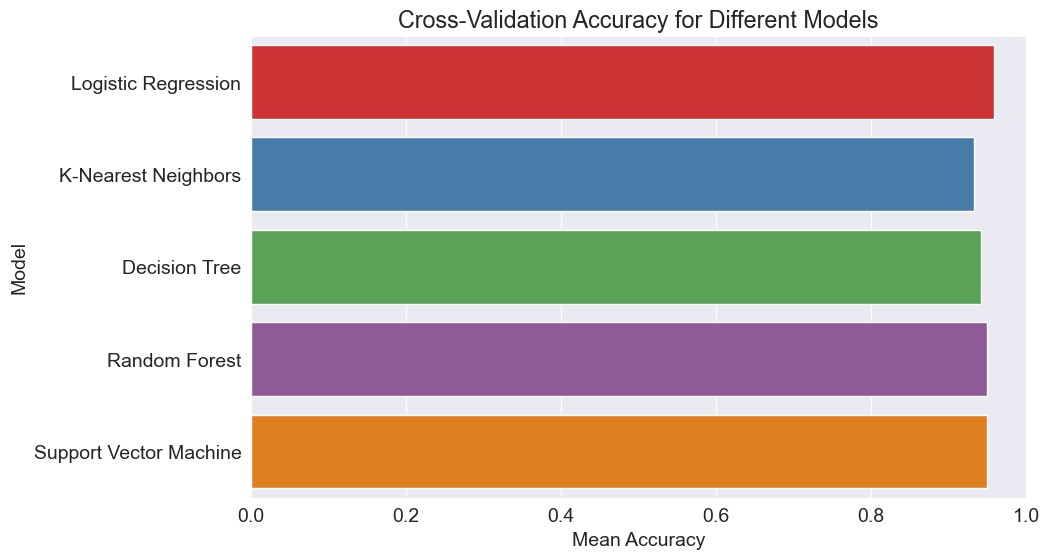

In [28]:
# Extract the model names and cross-validation scores
model_names = [name for name, _ in results]
cv_scores = [scores.mean() for _, scores in results]

# Create a bar plot of model accuracies using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=cv_scores, y=model_names)
plt.xlabel("Mean Accuracy")
plt.ylabel("Model")
plt.title("Cross-Validation Accuracy for Different Models")
plt.xlim(0, 1);  # Set the x-axis limits to represent accuracy between 0 and 100%

In [29]:
import pickle

# Save the StandardScaler to a file
with open('standard_scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Save the best model to a file
with open('logistic_regression.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)